In [1]:
# example of loading the inception v3 model
from keras.applications.inception_v3 import InceptionV3

Using TensorFlow backend.


In [2]:
# load model
model = InceptionV3(include_top=False, input_shape=(200,200,3), weights='imagenet')

87916544/87910968 [==============================] - 6s 0us/step


In [3]:
# summarize the model
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 99, 99, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 99, 99, 32)   0           batch_normalization_1[0][0]      
_______________________________________________________________________________________

In [24]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [0]:
train_data_dir = '/gdrive/My Drive/dataset/train'
validation_data_dir = '/gdrive/My Drive/dataset/val'

In [0]:
from keras.models import Sequential
from keras.layers import Dense 
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import MaxPooling2D
from keras.layers import ZeroPadding2D
from keras.layers import BatchNormalization, Input
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers, optimizers
from keras.callbacks import EarlyStopping

In [7]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
 train_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
 validation_data_dir,
 target_size=(200, 200),
 batch_size=32,
 class_mode='categorical')


Found 13125 images belonging to 8 classes.
Found 558 images belonging to 8 classes.


In [0]:
for l in range(len(model.layers)):
    model.layers[l].trainable = False

In [0]:
from keras.models import Model

x = Flatten()(model.output)
x = Dense(512, activation='relu')(x)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(8, activation='softmax')(x)

keras_model = Model(model.input, x)

In [10]:
opt = optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, amsgrad=False)

keras_model.compile(optimizer=opt, 
              loss='categorical_crossentropy',
              metrics=['accuracy'])
keras_model.summary()


Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 200, 200, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 99, 99, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 99, 99, 32)   96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 99, 99, 32)   0           batch_normalization_1[0][0]      
____________________________________________________________________________________________

In [0]:
total_train = 13125
total_val = 558
epochs = 10
batch_size = 500
esc = EarlyStopping(monitor='val_acc', patience=4)


In [12]:
history = keras_model.fit_generator(
    train_generator,
    steps_per_epoch=total_train // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_val // batch_size,
    #callbacks=[esc]
)

Epoch 1/10
11/26 [===========>..................] - ETA: 6:48 - loss: 4.8277 - accuracy: 0.3807

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 120 could not be retrieved. It could be because a worker has died.
  UserWarning)


12/26 [============>.................] - ETA: 6:40 - loss: 4.6048 - accuracy: 0.3828

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 305 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 726s 28s/step - loss: 3.0866 - accuracy: 0.4373 - val_loss: 1.3918 - val_accuracy: 0.5625
Epoch 2/10
16/26 [=================>............] - ETA: 4:29 - loss: 1.7850 - accuracy: 0.4648

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 78 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 701s 27s/step - loss: 1.7017 - accuracy: 0.4724 - val_loss: 1.5538 - val_accuracy: 0.4375
Epoch 3/10
26/26 [==============================] - 693s 27s/step - loss: 1.5470 - accuracy: 0.4736 - val_loss: 2.1639 - val_accuracy: 0.4688
Epoch 4/10
26/26 [==============================] - 701s 27s/step - loss: 1.4262 - accuracy: 0.4916 - val_loss: 2.2566 - val_accuracy: 0.3438
Epoch 5/10
17/26 [==================>...........] - ETA: 3:59 - loss: 1.3711 - accuracy: 0.4338

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 101 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 969s 37s/step - loss: 1.4166 - accuracy: 0.4555 - val_loss: 1.7260 - val_accuracy: 0.4375
Epoch 6/10
26/26 [==============================] - 713s 27s/step - loss: 1.4091 - accuracy: 0.4808 - val_loss: 2.7864 - val_accuracy: 0.4062
Epoch 7/10
23/26 [=========================>....] - ETA: 1:21 - loss: 1.3735 - accuracy: 0.4823

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 279 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 725s 28s/step - loss: 1.3836 - accuracy: 0.4832 - val_loss: 3.9990 - val_accuracy: 0.4688
Epoch 8/10
 5/26 [====>.........................] - ETA: 9:14 - loss: 1.3858 - accuracy: 0.4437

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 358 could not be retrieved. It could be because a worker has died.
  UserWarning)


 8/26 [========>.....................] - ETA: 8:13 - loss: 1.4389 - accuracy: 0.4609

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 130 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 737s 28s/step - loss: 1.3701 - accuracy: 0.4952 - val_loss: 2.5528 - val_accuracy: 0.4062
Epoch 9/10
 1/26 [>.............................] - ETA: 10:07 - loss: 1.0081 - accuracy: 0.5312

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 184 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 725s 28s/step - loss: 1.2407 - accuracy: 0.5300 - val_loss: 1.3706 - val_accuracy: 0.6250
Epoch 10/10
 4/26 [===>..........................] - ETA: 9:55 - loss: 1.2615 - accuracy: 0.4922 

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 373 could not be retrieved. It could be because a worker has died.
  UserWarning)


17/26 [==================>...........] - ETA: 4:09 - loss: 1.3594 - accuracy: 0.5147

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 371 could not be retrieved. It could be because a worker has died.
  UserWarning)


21/26 [=======================>......] - ETA: 2:20 - loss: 1.3223 - accuracy: 0.5327

/usr/local/lib/python3.6/dist-packages/keras/utils/data_utils.py:616: UserWarning: The input 323 could not be retrieved. It could be because a worker has died.
  UserWarning)


26/26 [==============================] - 742s 29s/step - loss: 1.3312 - accuracy: 0.5204 - val_loss: 3.0847 - val_accuracy: 0.5000


In [0]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(10)

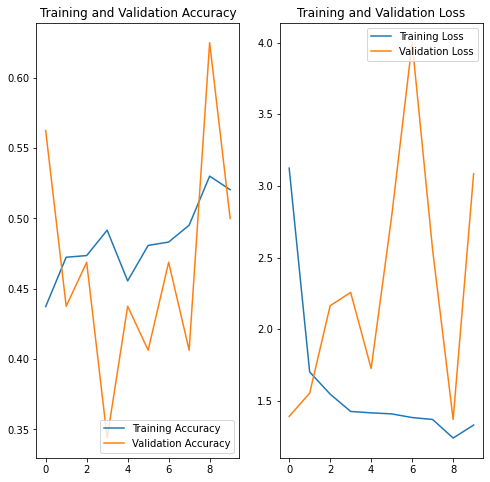

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [0]:
save_dir = "/gdrive/My Drive/DiplomWork/Forth"
json_file = open(save_dir+"/InceptionForEmotionDetection.json", "w")
model_json = keras_model.to_json()
json_file.write(model_json)
json_file.close()
keras_model.save_weights(save_dir+"/InceptionForEmotionDetection_weights.h5")